In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from catboost import CatBoostClassifier

In [3]:
dataset = pd.read_csv('../Datasets/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [5]:
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [1])],   
    remainder='passthrough'
)
X = onehotencoder.fit_transform(X)
X = X[:, 1:]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
classifier = CatBoostClassifier().fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Learning rate set to 0.025035
0:	learn: 0.6715999	total: 176ms	remaining: 2m 55s
1:	learn: 0.6523077	total: 190ms	remaining: 1m 34s
2:	learn: 0.6343125	total: 203ms	remaining: 1m 7s
3:	learn: 0.6177234	total: 214ms	remaining: 53.3s
4:	learn: 0.6020753	total: 229ms	remaining: 45.5s
5:	learn: 0.5879791	total: 244ms	remaining: 40.5s
6:	learn: 0.5754312	total: 254ms	remaining: 36.1s
7:	learn: 0.5639214	total: 265ms	remaining: 32.9s
8:	learn: 0.5531841	total: 277ms	remaining: 30.5s
9:	learn: 0.5433279	total: 290ms	remaining: 28.8s
10:	learn: 0.5316836	total: 305ms	remaining: 27.4s
11:	learn: 0.5232186	total: 319ms	remaining: 26.3s
12:	learn: 0.5128050	total: 333ms	remaining: 25.3s
13:	learn: 0.5025235	total: 344ms	remaining: 24.2s
14:	learn: 0.4939152	total: 355ms	remaining: 23.3s
15:	learn: 0.4847706	total: 367ms	remaining: 22.6s
16:	learn: 0.4784245	total: 380ms	remaining: 22s
17:	learn: 0.4709868	total: 402ms	remaining: 21.9s
18:	learn: 0.4643611	total: 429ms	remaining: 22.2s
19:	learn: 

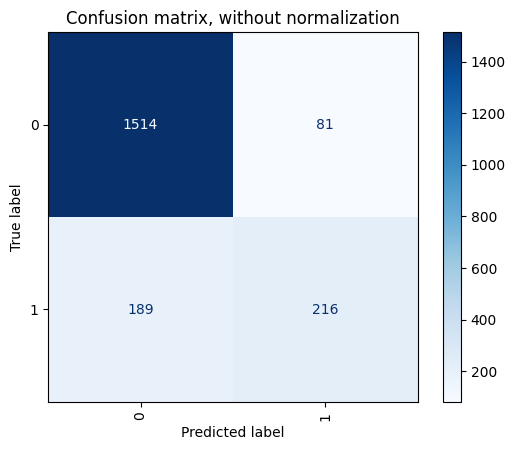

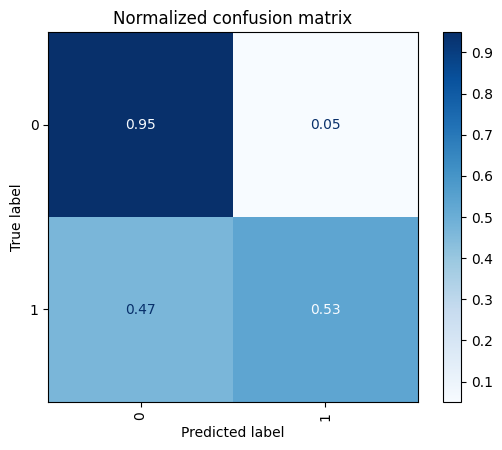

In [8]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm = confusion_matrix(y_test, y_pred)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    
    if normalize:
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier.classes_)
    
    disp.plot(cmap=plt.cm.Blues, values_format='.2f' if normalize else 'd', xticks_rotation='vertical')
    plt.title(title)
    plt.show()

In [9]:
cv_scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
cv_scores

Learning rate set to 0.023934
0:	learn: 0.6739076	total: 20.1ms	remaining: 20.1s
1:	learn: 0.6553148	total: 32.2ms	remaining: 16.1s
2:	learn: 0.6379401	total: 65.1ms	remaining: 21.6s
3:	learn: 0.6219498	total: 81.4ms	remaining: 20.3s
4:	learn: 0.6067761	total: 105ms	remaining: 20.8s
5:	learn: 0.5930965	total: 122ms	remaining: 20.2s
6:	learn: 0.5808770	total: 131ms	remaining: 18.6s
7:	learn: 0.5697418	total: 153ms	remaining: 18.9s
8:	learn: 0.5592975	total: 167ms	remaining: 18.4s
9:	learn: 0.5479548	total: 179ms	remaining: 17.7s
10:	learn: 0.5365151	total: 194ms	remaining: 17.5s
11:	learn: 0.5282010	total: 424ms	remaining: 34.9s
12:	learn: 0.5181349	total: 451ms	remaining: 34.3s
13:	learn: 0.5097421	total: 483ms	remaining: 34s
14:	learn: 0.5013959	total: 499ms	remaining: 32.7s
15:	learn: 0.4923173	total: 514ms	remaining: 31.6s
16:	learn: 0.4864282	total: 542ms	remaining: 31.3s
17:	learn: 0.4788947	total: 560ms	remaining: 30.6s
18:	learn: 0.4721651	total: 581ms	remaining: 30s
19:	learn: 

array([0.875  , 0.84625, 0.88625, 0.87   , 0.855  , 0.85875, 0.86875,
       0.84625, 0.8475 , 0.87125])

In [10]:
print("cv_scores mean: {}".format(np.mean(cv_scores)))
print("cv_scores std: {}".format(np.std(cv_scores)))

cv_scores mean: 0.8625
cv_scores std: 0.013098186897429741


In [11]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.741274817136886

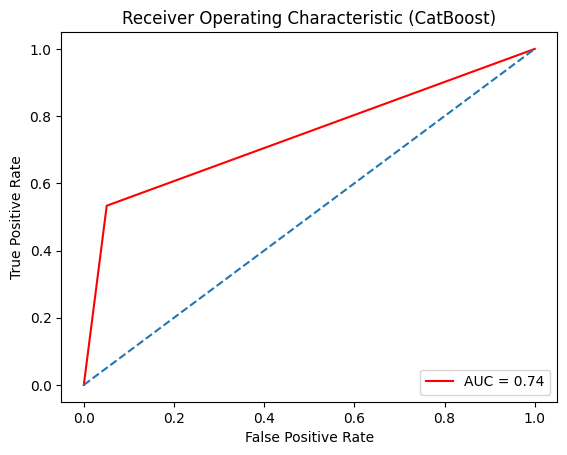

In [12]:
plt.title('Receiver Operating Characteristic (CatBoost)')
plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()